## Intro to Linear Regression in PyTorch

In [89]:
import numpy as np
import torch
from matplotlib import pyplot as plt

# Set style for plots
plt.style.use('seaborn')

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_17525/2300812394.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [90]:
# Create a dataset to train to a linear model
w = torch.tensor(3.0, requires_grad=True) # weight - initial value does not matter
b = torch.tensor(1.0, requires_grad=True) # bias - initial value does not matter

In [91]:
def forward(x):
    y = w * x + b
    return y

## Make a Prediction

In [92]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [93]:
x = torch.tensor([[1], [2]])
forward(x)

tensor([[4.],
        [7.]], grad_fn=<AddBackward0>)

## Linear Class

In [94]:
from torch.nn import Linear

In [95]:
torch.manual_seed(1)    # set the random seed for consistency

# Create a Linear model - for every one input, we get one output
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [96]:
x = torch.tensor([[2.0], [3.0]])
print(model(x))

tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)


## Custom Modules

In [97]:
import torch.nn as nn

In [98]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [99]:
torch.manual_seed(1)
model = LR(1, 1)

In [100]:
x = torch.tensor([[2.0], [3.0]])
print(model.forward(x))

tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)


## Create a Dataset

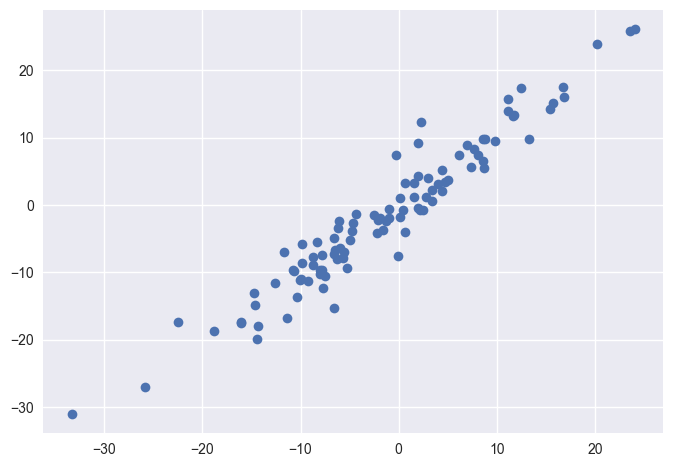

In [101]:
X = torch.randn(100, 1) * 10    # 100 random numbers from a normal distribution with mean 0 and std 10
Y = X + 3 * torch.randn(100,1)  # Y as a function of X with some noise
plt.plot(X.numpy(), Y.numpy(), 'o')

## Create Initial Linear Function

In [102]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [103]:
[w, b] = model.parameters() # w and b are the parameters of the model initially
w1 = w[0][0].item()         # w1 is the first element of w
b1 = b[0].item()            # b1 is the first element of b
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [104]:
def get_params():
    '''Funtion to return the current parameters of the model'''
    return (w[0][0].item(), b[0].item()) 

In [105]:
def plot_fit(title, color='r'):
    '''Function to plot the data and the regression line'''
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])    # range of x values on our chart is -30 to 30
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, color)
    plt.scatter(X, Y)
    plt.show()

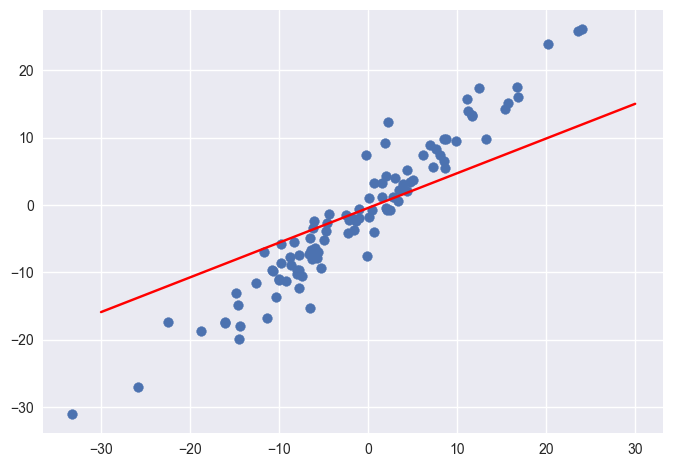

In [106]:
plot_fit('Initial Model', color='r')

## Train Linear Regressor

In [107]:
# Specify the loss function
criterion = nn.MSELoss()

# Specify the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Specify the number of epochs
epochs = 100

# Store the losses
losses = []

In [108]:
# Train the model
for e in range(epochs):
    y_pred = model.forward(X)                       # make a prediction
    loss = criterion(y_pred, Y)                     # calculate the loss
    print("epoch: ", e, "loss: ", loss.item())      # print the loss
    losses.append(loss)                             # store the loss
    optimizer.zero_grad()                           # zero the gradients before running the backward pass
    loss.backward()                                 # perform a backward pass (backpropagation)
    optimizer.step()                                # update the weights

epoch:  0 loss:  36.448333740234375
epoch:  1 loss:  25.847070693969727
epoch:  2 loss:  19.274917602539062
epoch:  3 loss:  15.200482368469238
epoch:  4 loss:  12.674424171447754
epoch:  5 loss:  11.10822868347168
epoch:  6 loss:  10.137073516845703
epoch:  7 loss:  9.534791946411133
epoch:  8 loss:  9.161182403564453
epoch:  9 loss:  8.929332733154297
epoch:  10 loss:  8.785365104675293
epoch:  11 loss:  8.695874214172363
epoch:  12 loss:  8.640158653259277
epoch:  13 loss:  8.605379104614258
epoch:  14 loss:  8.583580017089844
epoch:  15 loss:  8.569830894470215
epoch:  16 loss:  8.56106948852539
epoch:  17 loss:  8.555403709411621
epoch:  18 loss:  8.551656723022461
epoch:  19 loss:  8.549099922180176
epoch:  20 loss:  8.547281265258789
epoch:  21 loss:  8.545923233032227
epoch:  22 loss:  8.544849395751953
epoch:  23 loss:  8.54395580291748
epoch:  24 loss:  8.543170928955078
epoch:  25 loss:  8.542455673217773
epoch:  26 loss:  8.541786193847656
epoch:  27 loss:  8.54114341735839

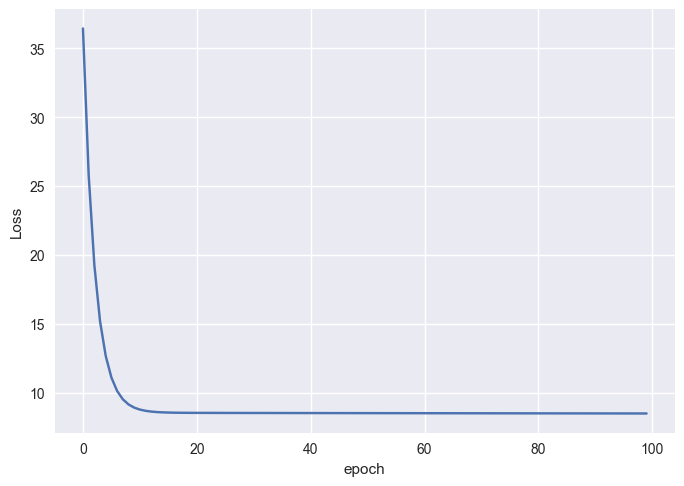

In [118]:
# Plot the loss
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title = 'Loss'

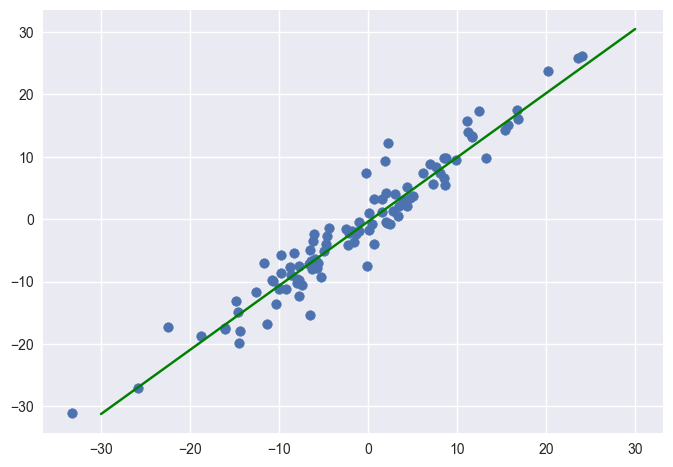

In [110]:
plot_fit('Trained Model', color='g')